In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('features.csv')
df.head()

,sequence_label,chirsqr_p,chisqr_X2.X-squared,chisqr_df.df,ks_p,ks_D.D,freq_p,freq_X2.X-squared,freq_df.df,eqdist_diff,...,gap_p,gap_X2.X-squared,gap_df.df,serial_autocorrelation,perm_observed_stat,perm_p,entropy_val,fft_dominant_frequency,fft_dominant_period,fft_max_magnitude
0,randoms-1,4.523092e-06,41.24,9,4.015142e-05,0.104,4.523092e-06,41.24,9,0.0146,...,5.973983e-108,634.069388,40,0.062339,4.854,1,3.271215,0.096,10.416667,175.438884
1,randoms-10,1.042736e-05,39.24,9,1.988713e-04,0.096,1.042736e-05,39.24,9,0.0050,...,6.612279e-138,789.232653,43,-0.042322,5.050,1,3.272462,0.338,2.958580,181.936266
2,randoms-2,8.298228e-10,61.08,9,1.349167e-04,0.098,8.298228e-10,61.08,9,0.0048,...,4.323428e-146,835.175510,45,0.017529,4.952,1,3.247295,0.182,5.494505,153.500962
3,randoms-3,1.996211e-11,69.40,9,4.200665e-07,0.124,1.996211e-11,69.40,9,0.0378,...,8.647444e-148,846.526531,46,-0.079872,4.622,1,3.233593,0.232,4.310345,165.118625
4,randoms-4,2.735290e-04,31.20,9,6.062199e-05,0.102,2.735290e-04,31.20,9,0.0168,...,7.919974e-118,691.355102,43,-0.085030,5.168,1,3.279424,0.468,2.136752,165.098372


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sequence_label          10 non-null     object 
 1   chirsqr_p               10 non-null     float64
 2   chisqr_X2.X-squared     10 non-null     float64
 3   chisqr_df.df            10 non-null     int64  
 4   ks_p                    10 non-null     float64
 5   ks_D.D                  10 non-null     float64
 6   freq_p                  10 non-null     float64
 7   freq_X2.X-squared       10 non-null     float64
 8   freq_df.df              10 non-null     int64  
 9   eqdist_diff             10 non-null     float64
 10  eqdist_empiricalMean    10 non-null     float64
 11  gap_p                   10 non-null     float64
 12  gap_X2.X-squared        10 non-null     float64
 13  gap_df.df               10 non-null     int64  
 14  serial_autocorrelation  10 non-null     float

In [11]:
X = df.drop('sequence_label', axis=1)
y = df['sequence_label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(2)
principal_components = pca.fit_transform(X_scaled)

In [14]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([y, pca_df], axis=1)

print(pca.explained_variance_ratio_)

[0.46516103 0.22775618]


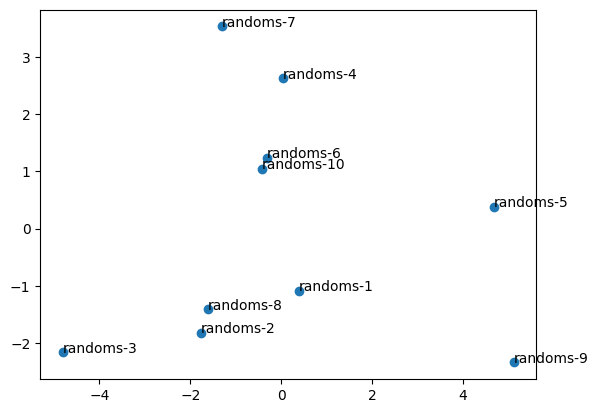

In [16]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for i, label in enumerate(pca_df['sequence_label']):
        plt.annotate(label, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.show()